## Project Statement #1: Timing variations in eclipsing binaries

In [ ]:
# Basic packages
import math

from math import sqrt

# Numerical python
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Package to read data files addressable with a URL.
import urllib.request

In [2]:
# My custom plot specifiers, in Python dictionary format.

one_panel_specs = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 18,              
 'figure.figsize' : [6, 6], 
 'lines.linewidth' : 2.5      
}

# Also create spefications for two-panel plots
# with residuals in the lower panel.

two_panel_specs = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 18,              
 'figure.figsize' : [6, 8], 
 'lines.linewidth' : 2.5      
}

# Update the plot style dictionary.

plt.rcParams.update(one_panel_specs)

In [3]:
# Specify the location where the data file may be found.
indir = 'http://www.astronomy.ohio-state.edu/~terndrup/A3350/EBstar.dat'

# Display URL
print('Reading data from', indir)

# Open the file and save the file locator information in a variable.  
#Show the type of this object, to demonstrate that Python permits the 
#definition of different object types.
lf = urllib.request.urlopen(indir)
print('Type of file locator object:', type(lf))

# Put the data into a numpy array.  Print some diagnostic information about the array. 
Data = np.genfromtxt(lf, unpack=True, names=True)

print('')
print('Type of data object         :', type(Data))
print('Field names in the data file:', Data.dtype.names)
print('Number of data points       :', len(Data))

Reading data from http://www.astronomy.ohio-state.edu/~terndrup/A3350/EBstar.dat
Type of file locator object: <class 'http.client.HTTPResponse'>

Type of data object         : <class 'numpy.ndarray'>
Field names in the data file: ('BJD',)
Number of data points       : 97


In [4]:
# Confirm file works
print(Data)

[(2449494.634374,) (2449499.707904,) (2449500.976214,) (2449815.537006,)
 (2449830.757777,) (2449840.904807,) (2449853.588777,) (2449858.662277,)
 (2449872.614487,) (2449881.493207,) (2449947.449548,) (2450221.421561,)
 (2450222.689991,) (2450232.837271,) (2450241.715851,) (2450255.667991,)
 (2450259.473431,) (2450549.935025,) (2450566.423705,) (2450568.960775,)
 (2450624.769986,) (2450643.795676,) (2450717.362226,) (2450831.517558,)
 (2450870.837458,) (2450903.815719,) (2450931.720379,) (2450955.819539,)
 (2450969.771879,) (2450983.724229,) (2450993.871209,) (2450997.676449,)
 (2451007.823719,) (2451021.775889,) (2451026.849409,) (2451030.65466 ,)
 (2451058.55929 ,) (2451220.912921,) (2451224.718331,) (2451234.865291,)
 (2451253.891311,) (2451256.428201,) (2451267.843591,) (2451276.722261,)
 (2451281.795801,) (2451295.748071,) (2451299.553371,) (2451300.821831,)
 (2451309.700151,) (2451319.847611,) (2451375.656621,) (2451394.682801,)
 (2451616.650801,) (2451666.117801,) (2451678.80182

The preliminary period in days can be found by finding the smallest interval between two of the eclipe times. It can be found in hours by dividing by 24.

In [7]:
# Based on the data the smallest interval is between 2450221.421561 and 2450222.689991
days = 2450222.689991 - 2450221.421561
hours = days / 24

print("Days in the preliminary period:", days)
print("Hours in the preliminary period:", hours)

Days in the preliminary period: 1.2684300001710653
Hours in the preliminary period: 0.052851250007127724


To find the eclipse numbers, divide the julian dates by the prelimiary period 1.27 days.

In [74]:
# Caclulate the difference between each date
d = np.diff(Data['BJD'])

In [79]:
# For loop to create an array with the eclipse numbers
for i in range(len(Data['BJD'])):
    e_num = d / days
print(e_num)

[  3.99985021   0.99990539 247.99223604  11.99969332   7.99967676
   9.99973983   3.99982656  10.99959004   6.99977137  51.99840826
 215.99300944   1.           7.99987386   6.999661    10.99953486
   3.00011826 228.99300234  12.99928258   2.00016556  43.99865266
  14.99940083  57.99811577  89.99734474  30.99887262  25.99927548
  21.9993693   18.99920374  10.99969253  10.99970042   7.99963735
   2.99996058   7.99986598  10.99955851   3.99984232   2.99996925
  21.99934564 127.99573566   3.0000946    7.99962158  14.999661
   2.00002365   8.99962158   6.99973195   3.99985809  10.99963735
   3.00000788   1.00002365   6.99945602   8.00001577  43.9984942
  14.99978714 174.99428425  38.99860457   9.99977925   7.99979502
  38.99875436  21.99932988  10.99966888 169.99460591   6.99992905
  10.99962946  10.99959793   3.99989751  16.99926681   1.00010249
  18.99936062   3.99991328  10.99962158 181.99418807 408.98719908
 180.99429844  18.99921162   2.99997635   3.99989751   3.99999212
   2.99973195

In [80]:
# Assign preliminary eclipse numbers
def eclipse(c):
    """
    Turns the eclipse numbers into preliminary ones as 
    intergers and creates an array of the results
    """
    M = []
    sum = 0
    for j in range(96):
        sum = sum + c[j]
        
        #convert to integers
        M.append("%.0f" %  sum)
        
    return M

In [130]:
# Use the function
eclipse(e_num)

['4',
 '5',
 '253',
 '265',
 '273',
 '283',
 '287',
 '298',
 '305',
 '357',
 '573',
 '574',
 '582',
 '589',
 '600',
 '603',
 '832',
 '845',
 '847',
 '891',
 '906',
 '964',
 '1054',
 '1085',
 '1111',
 '1133',
 '1152',
 '1163',
 '1174',
 '1182',
 '1185',
 '1193',
 '1204',
 '1208',
 '1211',
 '1233',
 '1361',
 '1364',
 '1372',
 '1387',
 '1389',
 '1398',
 '1405',
 '1409',
 '1420',
 '1423',
 '1424',
 '1431',
 '1439',
 '1483',
 '1498',
 '1673',
 '1712',
 '1722',
 '1730',
 '1769',
 '1791',
 '1802',
 '1972',
 '1979',
 '1990',
 '2001',
 '2005',
 '2022',
 '2023',
 '2042',
 '2046',
 '2057',
 '2239',
 '2648',
 '2829',
 '2848',
 '2851',
 '2855',
 '2859',
 '2862',
 '2873',
 '2877',
 '2885',
 '2888',
 '2892',
 '2903',
 '3136',
 '3141',
 '3144',
 '3368',
 '3420',
 '3442',
 '3472',
 '3670',
 '3718',
 '3722',
 '3751',
 '3778',
 '3935',
 '3979']

In [131]:
# Turn this data into an array
eclipse_num = [0, 
4,
 5,
 253,
 265,
 273,
 283,
 287,
 298,
 305,
 357,
 573,
 574,
 582,
 589,
 600,
 603,
 832,
 845,
 847,
 891,
 906,
 964,
 1054,
 1085,
 1111,
 1133,
 1152,
 1163,
 1174,
 1182,
 1185,
 1193,
 1204,
 1208,
 1211,
 1233,
 1361,
 1364,
 1372,
 1387,
 1389,
 1398,
 1405,
 1409,
 1420,
 1423,
 1424,
 1431,
 1439,
 1483,
 1498,
 1673,
 1712,
 1722,
 1730,
 1769,
 1791,
 1802,
 1972,
 1979,
 1990,
 2001,
 2005,
 2022,
 2023,
 2042,
 2046,
 2057,
 2239,
 2648,
 2829,
 2848,
 2851,
 2855,
 2859,
 2862,
 2873,
 2877,
 2885,
 2888,
 2892,
 2903,
 3136,
 3141,
 3144,
 3368,
 3420,
 3442,
 3472,
 3670,
 3718,
 3722,
 3751,
 3778,
 3935,
 3979]

In [300]:
# It is necessary to put plot style dicationary updates in
# a separate cell from the plot code.

plt.rcParams.update(two_panel_specs)

In [301]:
# Copy arrays so coding is easier to read.
X = eclipse_num
Y = Data['BJD']

# Step 1: Create a basis funciton that is all 1.000
C = np.ones(len(X))

# Step 2: Bind all the variables in the model. The
# software needs the transpose of the stacked basis
# functions
Matrix = np.vstack([X, C]).T

# Step 3: generate the coefficients of the fit.  The
# first element of the returned object contains these
# cofficients
slope, intcpt = np.linalg.lstsq(Matrix, Y, rcond=None)[0]

# Report:
print('Slope of fit to all points:', '{0:5.3f}'.format(slope))
print('Intercept                 :', '{0:5.3f}'.format(intcpt))


Slope of fit to all points: 1.258
Intercept                 : 2449519.017


Text(0, 0.5, 'Julian Date')

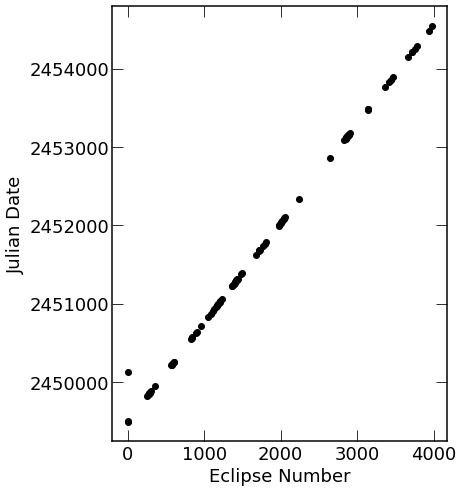

In [302]:
# Plot the general data before line fitting
fig,ax = plt.subplots()
ax.plot(eclipse_num, Data['BJD'], 'ok')
ax.set_xlabel('Eclipse Number')
ax.set_ylabel('Julian Date')

(-400, 300)

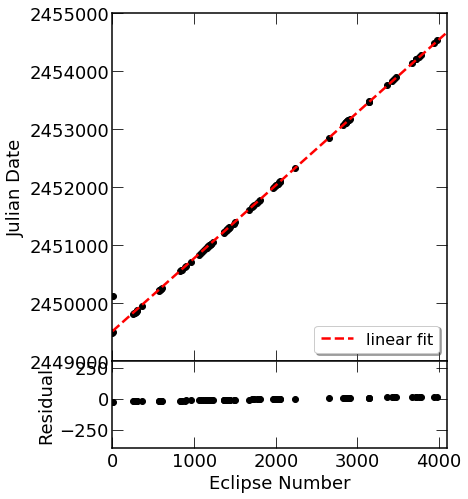

In [303]:
# Set up a two-panel plot with a smaller
# lower panel and no space between the panels.
fig,ax = plt.subplots(2, 1, sharex=True,
                      gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)

# Select (x,y) data for each group
x = eclipse_num
y = Data['BJD']

# Plot these data with distinguishing point
# styles
ax[0].plot(x, y, 'ok')
ax[0].set_xlim(0,4100)
ax[0].set_ylim(2449000,2455000)
ax[0].set_ylabel('Julian Date')

# Show model fit
ymodel = np.copy(xmodel)
ymodel = slope * xmodel + intcpt
ax[0].plot(xmodel, ymodel, 'r--', label="linear fit")

ax[0].legend(loc='lower right', shadow=True, fontsize=16)

# Compute residuals for all points, then separate
# them by group
en = np.array(eclipse_num)
resid = Data['BJD'] - (slope * en + intcpt)

r = resid

# Plot the residuals.
ax[1].plot(x, r, 'ok')
ax[1].set_ylabel('Residual')
ax[1].set_xlabel('Eclipse Number')
ax[1].set_ylim(-400, 300)

In [276]:
print('Residuals:', r)

Residuals: [-336.12273573  296.87723438 -336.12284559 -336.1227665  -336.12267515
 -336.12276492 -336.12269464 -336.12275452 -336.12283421 -336.12284401
 -336.12278152 -336.12300235 -336.12296232 -336.12280209 -336.12295189
 -336.12310157 -336.12283149 -336.12254094 -336.12293057 -336.12264051
 -336.12258825 -336.12274783 -336.12281617 -336.12258159 -336.12277071
 -336.12264896 -336.12256834 -336.12281779 -336.12276748 -336.12270716
 -336.12284693 -336.12277685 -336.12262662 -336.12274631 -336.12278619
 -336.12270511 -336.12265448 -336.12293982 -336.12269973 -336.1228595
 -336.12268907 -336.12257902 -336.12269876 -336.12275856 -336.12277844
 -336.12279813 -336.12266804 -336.12259801 -336.12300781 -336.12266759
 -336.12281633 -336.1224859  -336.1227309  -336.12293978 -336.12281949
 -336.12275927 -336.12277815 -336.12274752 -336.12272721 -336.12276435
 -336.12257415 -336.12260383 -336.12267352 -336.1226434  -336.12289292
 -336.12272289 -336.12277335 -336.12272323 -336.12276292 -336.12284

In [278]:
# Convert residuals to seconds
def residuals(R):
    S = []
    sum = 0
    for j in range(len(eclipse_num)):
        sum = R[j] * 86400
        
        #convert to integers
        S.append("%.0f" %  sum)
        
    return S

In [279]:
resids = residuals(r)
print('Residuals in seconds:', resids)

Residuals in seconds: ['-29041004', '25650193', '-29041014', '-29041007', '-29040999', '-29041007', '-29041001', '-29041006', '-29041013', '-29041014', '-29041008', '-29041027', '-29041024', '-29041010', '-29041023', '-29041036', '-29041013', '-29040988', '-29041021', '-29040996', '-29040992', '-29041005', '-29041011', '-29040991', '-29041007', '-29040997', '-29040990', '-29041011', '-29041007', '-29041002', '-29041014', '-29041008', '-29040995', '-29041005', '-29041009', '-29041002', '-29040997', '-29041022', '-29041001', '-29041015', '-29041000', '-29040991', '-29041001', '-29041006', '-29041008', '-29041010', '-29040999', '-29040992', '-29041028', '-29040998', '-29041011', '-29040983', '-29041004', '-29041022', '-29041012', '-29041006', '-29041008', '-29041005', '-29041004', '-29041007', '-29040990', '-29040993', '-29040999', '-29040996', '-29041018', '-29041003', '-29041008', '-29041003', '-29041007', '-29041014', '-29041003', '-29041001', '-29041022', '-29041014', '-29041012', '-2

In [287]:
r2 = np.array(resids).astype(np.float)
print("Standard deviation of the residuals:", np.std(r2))

Standard deviation of the residuals: 5524351.5979757765


### Task B

In [186]:
# Specify the location where the data files may be found.
indir2 = 'http://www.astronomy.ohio-state.edu/~terndrup/A3350/CMDra_times.dat'

# Display URL
print('Reading data from', indir2)

# Open the file and save the file locator information in a variable.  
#Show the type of this object, to demonstrate that Python permits the 
#definition of different object types.
lf = urllib.request.urlopen(indir2)
print('Type of file locator object:', type(lf))

# Put the data into a numpy array.  Print some diagnostic information about the array. 
Data2 = np.genfromtxt(lf, unpack=True, names=True, skip_header=22)

print('')
print('Type of data object         :', type(Data2))
print('Field names in the data file:', Data2.dtype.names)
print('Number of data points       :', len(Data2))


Reading data from http://www.astronomy.ohio-state.edu/~terndrup/A3350/CMDra_times.dat
Type of file locator object: <class 'http.client.HTTPResponse'>

Type of data object         : <class 'numpy.ndarray'>
Field names in the data file: ('BJD', 'error', 'enum', 'primsec', 'source')
Number of data points       : 263


Find the period in days by dividing the differnce between Julian Dates by the eclipse numbers.

In [187]:
# Compute the difference between Julian Dates
diff2 = np.diff(Data2['BJD'])

In [188]:
# Make and array of eclipse numbers
enums = np.array(Data2['enum'])

In [189]:
# For loop to create an array for periods
for j in range(len(Data2['enum'])):
    p_days = diff2 / enums[j]
print("Periods in days:",p_days)

Periods in days: [ 2.71502184e-02  1.75009836e+00  8.53442111e-04  5.12612009e-04
  3.41484653e-04  1.70501885e-04  2.73210905e-03  1.36606656e-02
  6.81326931e-02  3.58559962e-03  5.12606354e-04  8.53441034e-04
  1.87866155e-03  3.41517771e-03  5.11970921e-04  8.54076467e-04
  3.75666236e-03  2.39060824e-03  1.77588328e-02  5.11952073e-04
  1.36609855e-03  7.18894111e-02  3.41445611e-04  5.63473586e-03
  3.41514540e-04  2.04908212e-03  1.36608212e-03  5.12571352e-04
  8.53505654e-04  2.73210258e-03  9.80151018e-02  1.87862412e-03
  1.87800458e-03  1.60512776e-02  5.25934238e-02  2.37356497e-02
  5.11973613e-04  1.36606624e-03  2.39061120e-03  8.91356287e-02
  5.12275687e-03  3.75667205e-03  6.54006155e-02  4.02988697e-02
  3.75668013e-03  1.71269893e-01  1.03137798e-01  1.45147474e-02
  6.18143791e-02  9.39138368e-03  8.54097738e-04  4.26861093e-03
  5.12646742e-04  1.87797254e-03  2.22019655e-03  1.87803985e-03
  7.95731430e-02  4.26928810e-03  1.70760878e-03  5.29314055e-03
  1.3660

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [304]:
# Copy arrays so coding is easier to read.
X = Data2['enum']
Y = Data2['BJD']

# Step 1: Create a basis funciton that is all 1.000
C = np.ones(len(X))

# Step 2: Bind all the variables in the model. The
# software needs the transpose of the stacked basis
# functions
Matrix = np.vstack([X, C]).T

# Step 3: generate the coefficients of the fit.  The
# first element of the returned object contains these
# cofficients
slope, intcpt = np.linalg.lstsq(Matrix, Y, rcond=None)[0]

# Report:
print('Slope of fit to all points:', '{0:5.3f}'.format(slope))
print('Intercept                 :', '{0:5.3f}'.format(intcpt))


Slope of fit to all points: 1.268
Intercept                 : 2449830.757


(-0.1, 0.1)

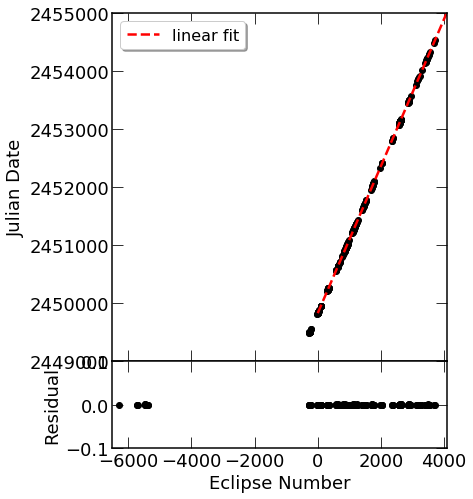

In [305]:
# Set up a two-panel plot with a smaller
# lower panel and no space between the panels.
fig,ax = plt.subplots(2, 1, sharex=True,
                      gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)

# Select (x,y) data for each group
x = Data2['enum']
y = Data2['BJD']

# Plot these data with distinguishing point
# styles
ax[0].plot(x, y, 'ok')
ax[0].set_xlim(-6500,4100)
ax[0].set_ylim(2449000,2455000)
ax[0].set_ylabel('Julian Date')

# Show model fit and equality.
ymodel = np.copy(xmodel)
ymodel = slope * xmodel + intcpt
ax[0].plot(xmodel, ymodel, 'r--', label="linear fit")

ax[0].legend(loc='upper left', shadow=True, fontsize=16)

# Compute residuals for all points, then separate
# them by group
residuals = Data2['BJD'] - (slope * Data2['enum'] + intcpt)

# Plot the residuals.
ax[1].plot(x, residuals, 'ok')
ax[1].set_ylabel('Residual')
ax[1].set_xlabel('Eclipse Number')
ax[1].set_ylim(-.1, .1)

Find the standard deviation of the resiaduals and the standard deviation of the errors

In [221]:
np.std(residuals)

0.0006095556483665468

In [218]:
np.std(Data2['error'])

7.500670106492952e-05

The standard deviation of the expected errors in days is 0.000075 and the standard deviation of the residuals is 0.0006. The standard deviation of the residuals proves to be larger than that of the expected errors.

Plot the residuals against different quantities in the data to see if there is a correlation.

Text(0, 0.5, 'Data Source')

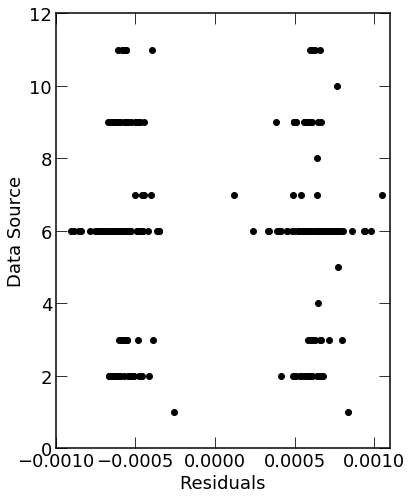

In [198]:
fig,ax = plt.subplots()
# Plot limits
ax.set_xlim(-0.001,0.0011)
ax.set_ylim(0,12)  
ax.plot(residuals, Data2['source'],'ok')
ax.set_xlabel('Residuals')
ax.set_ylabel('Data Source')

Text(0, 0.5, 'Eclipse Type')

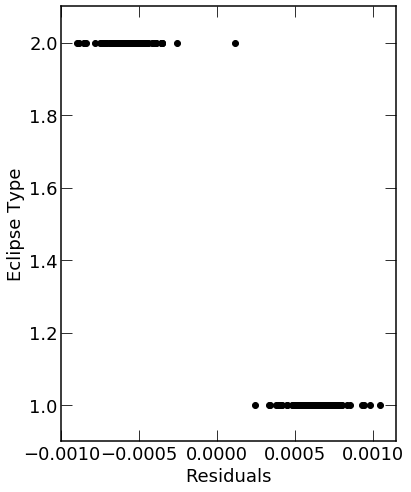

In [201]:
fig,ax = plt.subplots()  
ax.plot(residuals, Data2['primsec'],'ok')
# Plot limits
ax.set_xlim(-0.001,0.00115)
ax.set_ylim(.9,2.1)
ax.set_xlabel('Residuals')
ax.set_ylabel('Eclipse Type')

The eclipse type appears to be correlated with the resiudals. For the most part the residuals are positive for primary eclipses and for secondary eclipses they are negative.

(-0.1, 0.1)

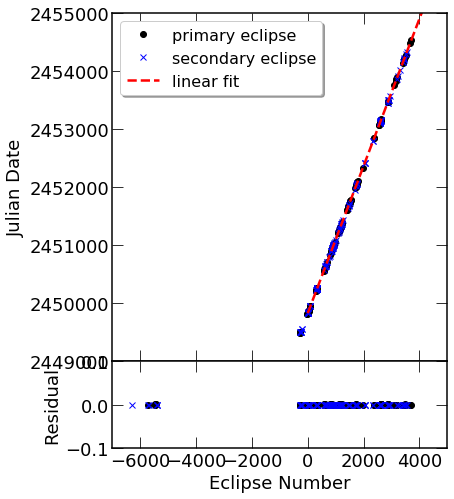

In [306]:
# Set up a two-panel plot with a smaller
# lower panel and no space between the panels.
fig,ax = plt.subplots(2, 1, sharex=True,
                      gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)

# Select (x,y) data for each group
x0 = Data2['enum'][Data2['primsec']==1]
x1 = Data2['enum'][Data2['primsec']==2]
y0 = Data2['BJD'][Data2['primsec']==1]
y1 = Data2['BJD'][Data2['primsec']==2]

# Plot these data with distinguishing point
# styles
ax[0].plot(x0, y0, 'ok', label='primary eclipse')
ax[0].plot(x1, y1, 'xb', label='secondary eclipse')
ax[0].set_xlim(-7000,5000)
ax[0].set_ylim(2449000,2455000)
ax[0].set_ylabel('Julian Date')

# Show model fit and equality.
ymodel = np.copy(xmodel)
ymodel = slope * xmodel + intcpt
ax[0].plot(xmodel, ymodel, 'r--', label="linear fit")

ax[0].legend(loc='upper left', shadow=True, fontsize=16)

# Compute residuals for all points, then separate
# them by group
residuals = Data2['BJD'] - (slope * Data2['enum'] + intcpt)

r2 = residuals[Data2['primsec']==1]
r3 = residuals[Data2['primsec']==2]

# Plot the residuals.
ax[1].plot(x0, r2, 'ok')
ax[1].plot(x1, r3, 'xb')
ax[1].set_ylabel('Residual')
ax[1].set_xlabel('Eclipse Number')
ax[1].set_ylim(-0.1, 0.1)

Find the standard deviations between each type of eclipse.

In [223]:
np.std(r2)

0.0001260590711480315

In [224]:
np.std(r3)

0.00012199883301730635

The reason the residuals are large for a simple solution because the data includes two types of eclipses: primary and secondary. When the residuals of each separate type of eclipse are taken, the results are smaller. When the data for primary and secondary eclipses are separated, they both have residuals of about 0.0012. This is still larger than the standard deviation of the expected errors, 0.000075, but it is smaller than the previously computed standard deviation of the residuals, 0.0006.

### Task C

Calculate the distance between the two stars and their velocity.

In [57]:
# Gravitational constant
G = 6.6743*10**-11
# 1 solar mass in kg
s = 1.989 * 10**30
# Mass 1
m1 = 0.22 * s
# Mass 2
m2 = m1
# Period 
P = np.mean(p_days)

In [64]:
# Keplers third law to find distance
a = ((P*P*G*(m1+m2))/(4*3.14159*3.14159))**(1/3)

59626.71060236011


In [70]:
# Convert from m to au
au = (a/(1.496**11))
print(au)

709.8937010897805


In [68]:
# Velocity formula
v = sqrt((G*m1)/a)

22131516.20945171


In [71]:
# Convert from m/s to km/s
v2 = v/1000
print(v2)

22131.516209451707


The physical separation between the two stars in the CM Draconis binary system is 59,626.71 meters or 709.89 au. The orbital velocity of both stars is 22,131.51 kilometers per second.

### Task D

In [225]:
print("Min julian date:",min(Data2['BJD']))

Min julian date: 2441855.75476


In [226]:
print("Max julian date:",max(Data2['BJD']))

Max julian date: 2454541.558136


Using the following online converter:
https://www.onlineconversion.com/julian_date.htm

The first Julian date, 2441855, is calender date June 21, 1973. The last Julian date, 2454541, is calender date March 15, 2008. Obersevations taken May 15th, 2021 would be 2458985 in Julian terms. This would extend past the last date collected by 13 years and about 2 months. 

May 16th, 2021 would be Julian Date 2359350. This will be used to calculate the new eclipse number.

In [233]:
diff3 = np.mean(diff2)
day = 2359350 - 2458985
e = diff3 / day
print("The new eclipse number is:",e)

The new eclipse number is: -0.00044619444732816053
